In [28]:
import pandas as pd
import numpy as np
data=pd.read_excel('pca_credit_card.xlsx', header=1, sheet_name='Data').iloc[0:, 1:]

In [29]:
data.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [30]:
data.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target=data['default']
X_features=data.drop('default', axis=1)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

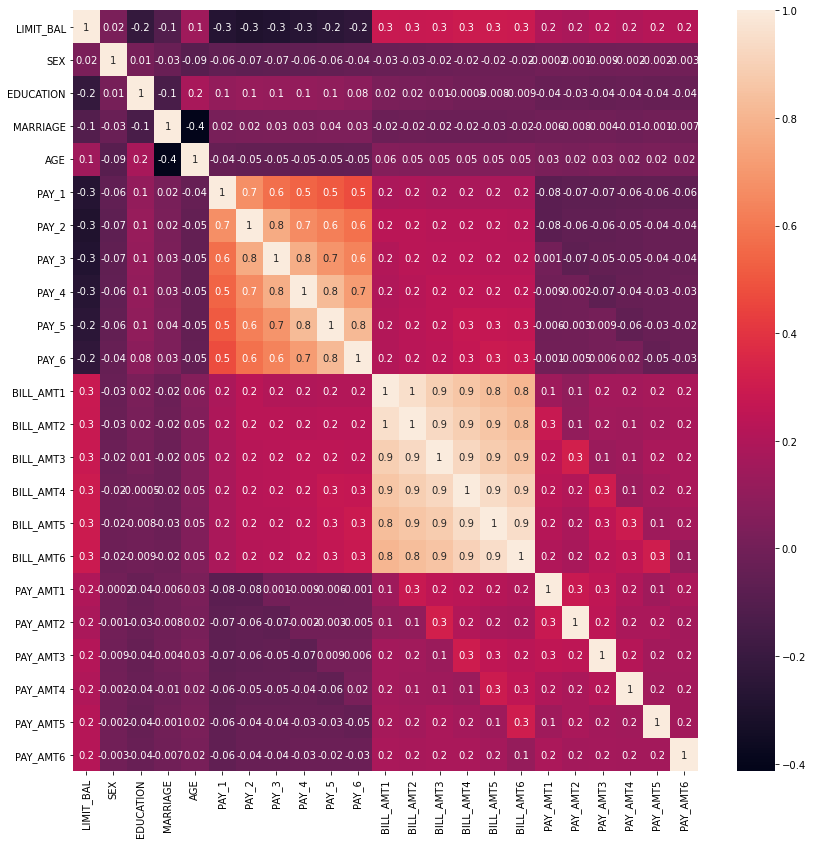

In [32]:
corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print(cols_bill)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [35]:
scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print(pca.explained_variance_ratio_)

[0.90555253 0.0509867 ]


2개의 pca 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있다아.

In [42]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

In [47]:
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
rf=RandomForestClassifier

In [51]:
scores_pca=cross_val_score(rf, df_pca, y_target, scoring='accuracy', cv=3)


TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [49]:
y_target

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64